<a href="https://colab.research.google.com/github/harsha6811/harsha6811/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df = pd.read_csv('gender_submission.csv')

In [ ]:
print(df.to_string())

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
train = pd.read_csv("/content/train.csv")
train.head()

,PassengerId,Survived,Pclass,Unnamed: 3,Unnamed: 4,Age,SibSp,Parch,Unnamed: 8,Fare
0,1,0,3,NaN,NaN,22.0,1,0,NaN,7.2500
1,2,1,1,NaN,NaN,38.0,1,0,NaN,71.2833
2,3,1,3,NaN,NaN,26.0,0,0,NaN,7.9250
3,4,1,1,NaN,NaN,35.0,1,0,NaN,53.1000
4,5,0,3,NaN,NaN,35.0,0,0,NaN,8.0500


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Unnamed: 3   0 non-null      float64
 4   Unnamed: 4   0 non-null      float64
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Unnamed: 8   0 non-null      float64
 9   Fare         891 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 69.7 KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Unnamed: 3,Unnamed: 4,Age,SibSp,Parch,Unnamed: 8,Fare
count,891.000000,891.000000,891.000000,0.0,0.0,714.000000,891.000000,891.000000,0.0,891.000000
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000
max,891.000000,1.000000,3.000000,NaN,NaN,80.000000,8.000000,6.000000,NaN,512.329200


In [ ]:
test = pd.read_csv("/content/test.csv")
test.head()

,PassengerId,Pclass,Unnamed: 2,Unnamed: 3,Age,SibSp,Parch,Ticket,Fare,Cabin
0,892,3,NaN,NaN,34.5,0,0,330911,7.8292,NaN
1,893,3,NaN,NaN,47.0,1,0,363272,7.0000,NaN
2,894,2,NaN,NaN,62.0,0,0,240276,9.6875,NaN
3,895,3,NaN,NaN,27.0,0,0,315154,8.6625,NaN
4,896,3,NaN,NaN,22.0,1,1,3101298,12.2875,NaN


In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [ ]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


<Axes: ylabel='count'>

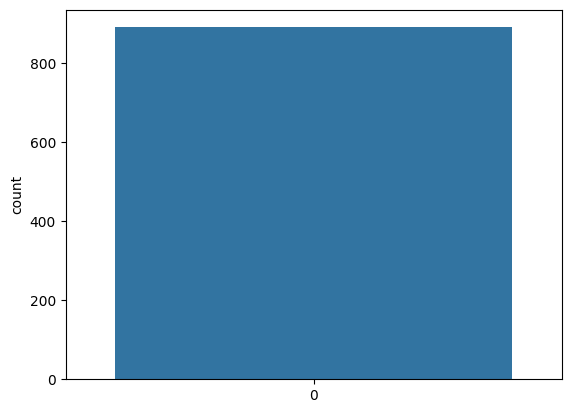

In [ ]:
sns.countplot(train['Survived'])

<Axes: ylabel='count'>

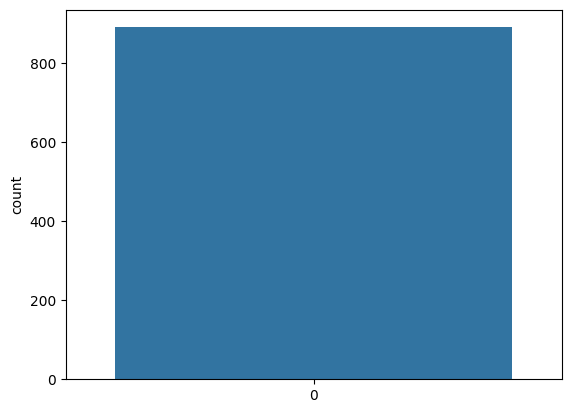

In [ ]:
sns.countplot(train['Pclass'])

<Axes: ylabel='count'>

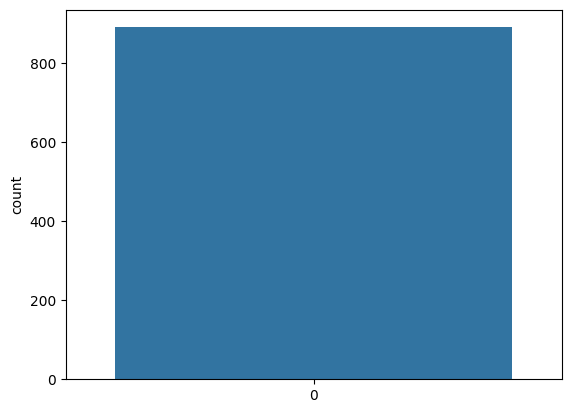

In [ ]:
sns.countplot(train['Age'])

<Axes: xlabel='Age', ylabel='Density'>

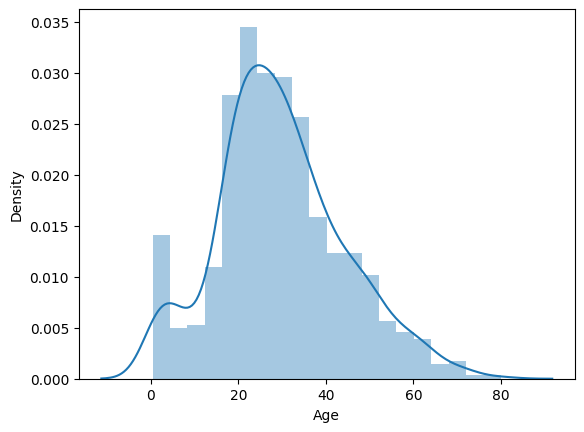

In [ ]:
##numerical attributes
sns.distplot(train['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

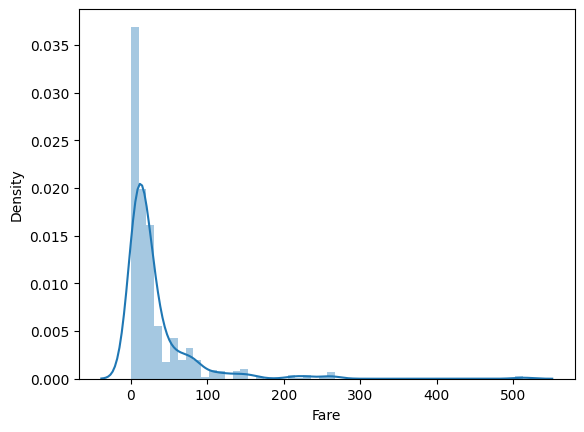

In [ ]:
sns.distplot(train['Fare'])

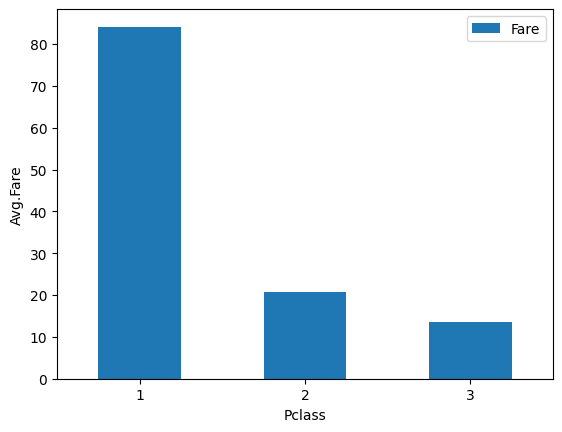

In [ ]:
class_fare=train.pivot_table(index='Pclass' , values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg.Fare')
plt.xticks(rotation=0)
plt.show()

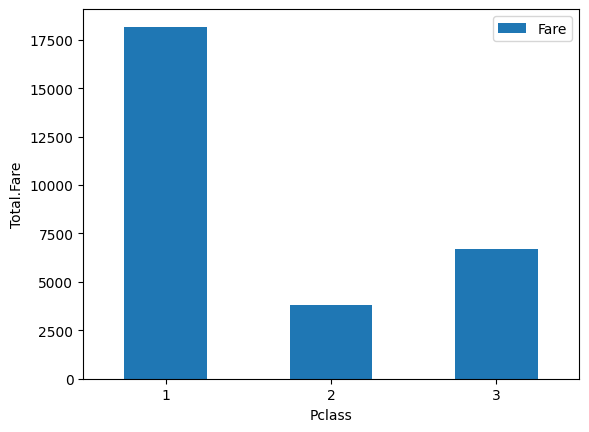

In [ ]:
class_fare=train.pivot_table(index='Pclass' , values='Fare' , aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total.Fare')
plt.xticks(rotation=0)
plt.show()

DATA PRE-PROCESSING



In [ ]:
train_len = len(train)
df=pd.concat([train, test], axis=0)
df=df.reset_index()
df.head()

,index,PassengerId,Survived,Pclass,Unnamed: 3,Unnamed: 4,Age,SibSp,Parch,Unnamed: 8,Fare,Unnamed: 2,Ticket,Cabin
0,0,1,0.0,3,NaN,NaN,22.0,1,0,NaN,7.2500,NaN,NaN,NaN
1,1,2,1.0,1,NaN,NaN,38.0,1,0,NaN,71.2833,NaN,NaN,NaN
2,2,3,1.0,3,NaN,NaN,26.0,0,0,NaN,7.9250,NaN,NaN,NaN
3,3,4,1.0,1,NaN,NaN,35.0,1,0,NaN,53.1000,NaN,NaN,NaN
4,4,5,0.0,3,NaN,NaN,35.0,0,0,NaN,8.0500,NaN,NaN,NaN


In [ ]:
df.tail()

,index,PassengerId,Survived,Pclass,Unnamed: 3,Unnamed: 4,Age,SibSp,Parch,Unnamed: 8,Fare,Unnamed: 2,Ticket,Cabin
1304,413,1305,NaN,3,NaN,NaN,NaN,0,0,NaN,8.0500,NaN,A.5. 3236,NaN
1305,414,1306,NaN,1,NaN,NaN,39.0,0,0,NaN,108.9000,NaN,PC 17758,C105
1306,415,1307,NaN,3,NaN,NaN,38.5,0,0,NaN,7.2500,NaN,SOTON/O.Q. 3101262,NaN
1307,416,1308,NaN,3,NaN,NaN,NaN,0,0,NaN,8.0500,NaN,359309,NaN
1308,417,1309,NaN,3,NaN,NaN,NaN,1,1,NaN,22.3583,NaN,2668,NaN


In [ ]:
##Find the null value
df.isnull().sum()

index             0
PassengerId       0
Survived        418
Pclass            0
Unnamed: 3     1309
Unnamed: 4     1309
Age             263
SibSp             0
Parch             0
Unnamed: 8     1309
Fare              1
Unnamed: 2     1309
Ticket          891
Cabin          1218
dtype: int64

In [ ]:
df = df.drop(columns=['Cabin'],axis=1)

In [ ]:
df['Age'].mean()

29.881137667304014

In [ ]:
#fill missing values using mean of that column
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [ ]:
df['Ticket'].mode()[0]

'PC 17608'

In [ ]:
df['Ticket']= df['Ticket'].fillna(df['Ticket'].mode()[0])

CORRELATION MATRIX

<Axes: >

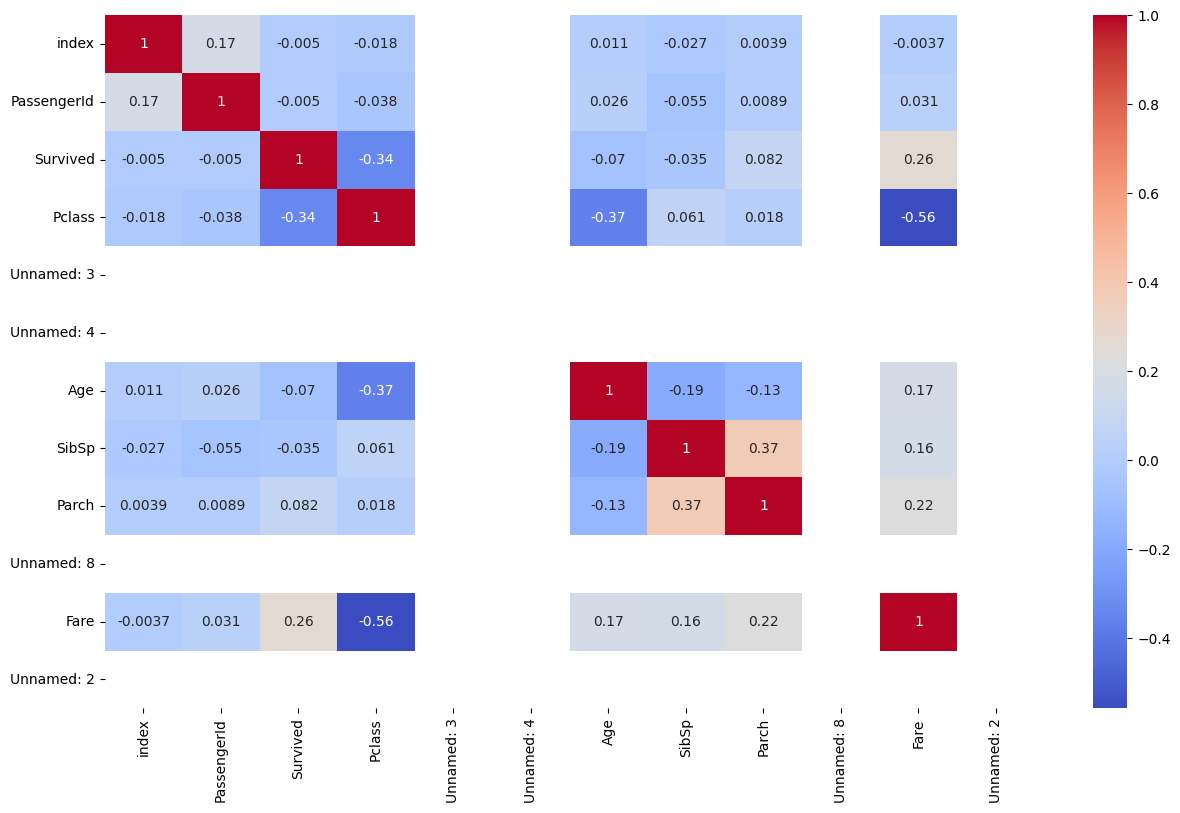

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
df.head()

,index,PassengerId,Survived,Pclass,Unnamed: 3,Unnamed: 4,Age,SibSp,Parch,Unnamed: 8,Fare,Unnamed: 2,Ticket
0,0,1,0.0,3,NaN,NaN,22.0,1,0,NaN,7.2500,NaN,PC 17608
1,1,2,1.0,1,NaN,NaN,38.0,1,0,NaN,71.2833,NaN,PC 17608
2,2,3,1.0,3,NaN,NaN,26.0,0,0,NaN,7.9250,NaN,PC 17608
3,3,4,1.0,1,NaN,NaN,35.0,1,0,NaN,53.1000,NaN,PC 17608
4,4,5,0.0,3,NaN,NaN,35.0,0,0,NaN,8.0500,NaN,PC 17608


In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Fare', 'Ticket']
le = LabelEncoder()

for col in cols:
  df[col] = le.fit_transform(df[col])
df.head()

,index,PassengerId,Survived,Pclass,Unnamed: 3,Unnamed: 4,Age,SibSp,Parch,Unnamed: 8,Fare,Unnamed: 2,Ticket
0,0,1,0.0,3,NaN,NaN,22.0,1,0,NaN,20,NaN,319
1,1,2,1.0,1,NaN,NaN,38.0,1,0,NaN,238,NaN,319
2,2,3,1.0,3,NaN,NaN,26.0,0,0,NaN,50,NaN,319
3,3,4,1.0,1,NaN,NaN,35.0,1,0,NaN,218,NaN,319
4,4,5,0.0,3,NaN,NaN,35.0,0,0,NaN,52,NaN,319


TRAIN-TEST SPLITTING

In [ ]:
train = df.iloc[:train_len, :]
test = df.iloc[train_len:, :]

In [ ]:
train.head()

,index,PassengerId,Survived,Pclass,Unnamed: 3,Unnamed: 4,Age,SibSp,Parch,Unnamed: 8,Fare,Unnamed: 2,Ticket
0,0,1,0.0,3,NaN,NaN,22.0,1,0,NaN,20,NaN,319
1,1,2,1.0,1,NaN,NaN,38.0,1,0,NaN,238,NaN,319
2,2,3,1.0,3,NaN,NaN,26.0,0,0,NaN,50,NaN,319
3,3,4,1.0,1,NaN,NaN,35.0,1,0,NaN,218,NaN,319
4,4,5,0.0,3,NaN,NaN,35.0,0,0,NaN,52,NaN,319


In [ ]:
test.head()

,index,PassengerId,Survived,Pclass,Unnamed: 3,Unnamed: 4,Age,SibSp,Parch,Unnamed: 8,Fare,Unnamed: 2,Ticket
891,0,892,NaN,3,NaN,NaN,34.5,0,0,NaN,43,NaN,152
892,1,893,NaN,3,NaN,NaN,47.0,1,0,NaN,12,NaN,221
893,2,894,NaN,2,NaN,NaN,62.0,0,0,NaN,77,NaN,73
894,3,895,NaN,3,NaN,NaN,27.0,0,0,NaN,63,NaN,147
895,4,896,NaN,3,NaN,NaN,22.0,1,1,NaN,93,NaN,138


In [ ]:
#input split
X = train.drop(columns=['PassengerId', 'Survived'],axis=1)
Y = train['Survived']

In [ ]:
X.head()

,index,Pclass,Unnamed: 3,Unnamed: 4,Age,SibSp,Parch,Unnamed: 8,Fare,Unnamed: 2,Ticket
0,0,3,NaN,NaN,22.0,1,0,NaN,20,NaN,319
1,1,1,NaN,NaN,38.0,1,0,NaN,238,NaN,319
2,2,3,NaN,NaN,26.0,0,0,NaN,50,NaN,319
3,3,1,NaN,NaN,35.0,1,0,NaN,218,NaN,319
4,4,3,NaN,NaN,35.0,0,0,NaN,52,NaN,319


MODEL TRAINING

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
#classify columns
def classify(model, x ,y):
   x_train, x_test, y_train, y_test = train_test_split(X , y, test_size=0.25, random_state=42)
   model.fit(x_train, y_train)
   print('Accuracy:', model.score(x_test, y_test))

   score = cross_val_score(model, X, y, cv=5)
   print('CV Score:', np.mean(score))